# Declaração das bibliotecas

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image as mpimg

Criação de uma lista com os nomes das imagens

In [2]:
listaImagens = ['foto na escada', 'foto na grama', 'foto no muro', 'foto no espelho', 'foto no quadro']

# Histograma

In [3]:
def histograma(imagem):
    # leitura da imagem a qual vamos calcular o histotgrama
    img = cv2.imread(imagem+'.jpeg')

    # converte em nível de cinza
    cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use o matplotlib para exibir a imagem
    plt.imshow(cinza, cmap='gray')
    plt.title("Nível de cinza (" + imagem + ")")
    plt.axis('off')  # Remova os eixos
    plt.show()

    #Função calcHist para calcular o hisograma da imagem
    h = cv2.calcHist([cinza], [0], None, [256], [0, 255])

   # Crie uma figura
    plt.figure('Histograma')
    plt.title("Histograma em nível de cinza")
    plt.xlabel("Intensidade")
    plt.xlim([0, 255])
    plt.ylabel("Qtde de Pixels")

    # Plote o histograma com cor vermelha e estilo de linha
    plt.plot(h, color='red', linestyle='-', linewidth=2)

    # Exiba o histograma
    plt.show()

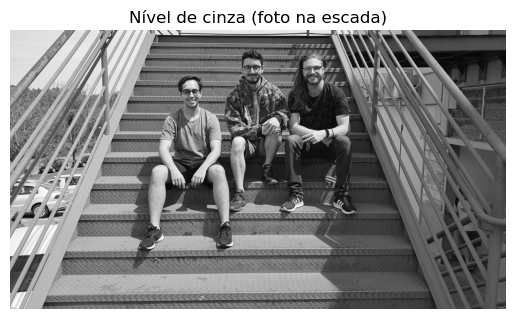

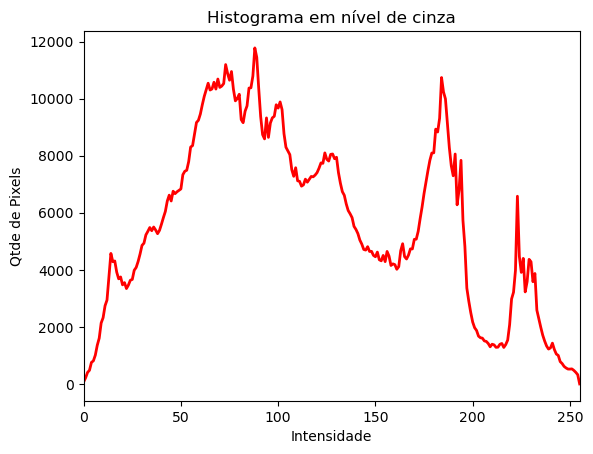

In [4]:
histograma(listaImagens[0])

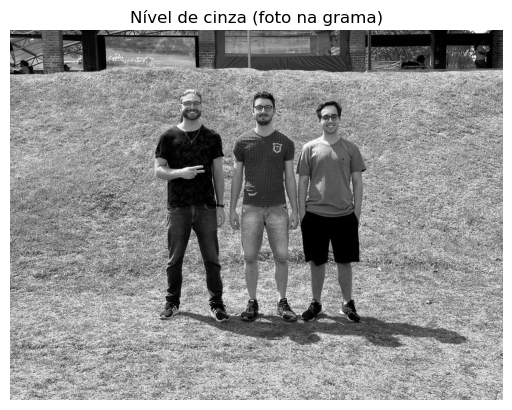

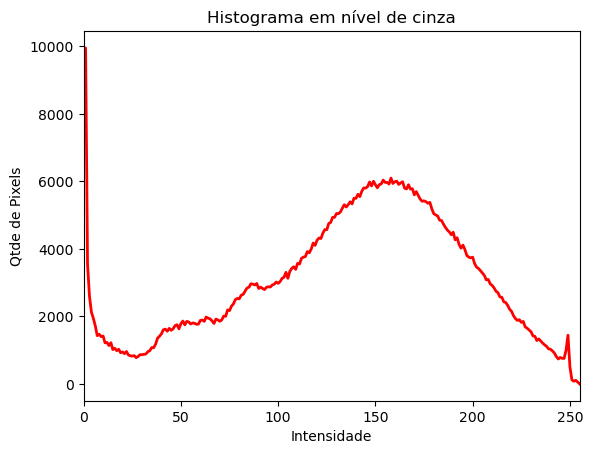

In [5]:
histograma(listaImagens[1])

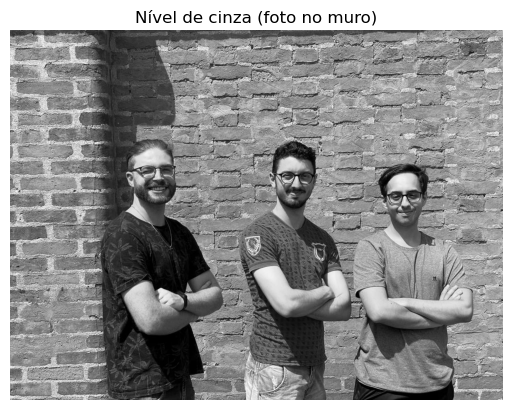

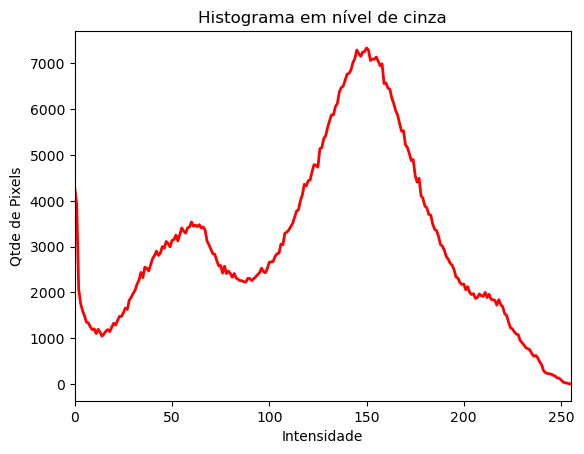

In [6]:
histograma(listaImagens[2])

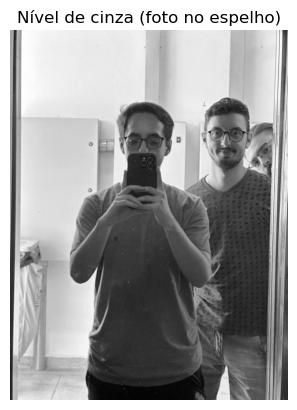

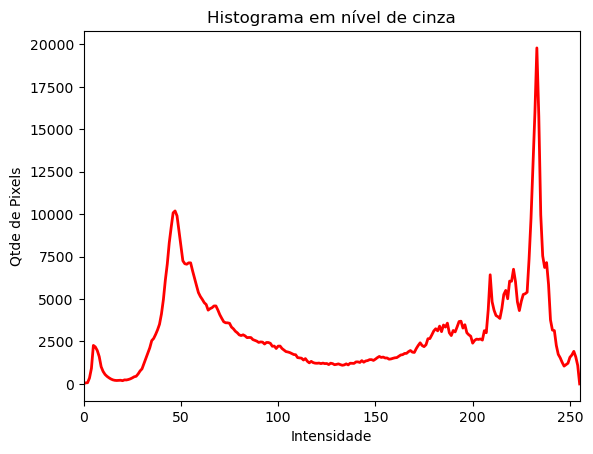

In [7]:
histograma(listaImagens[3])

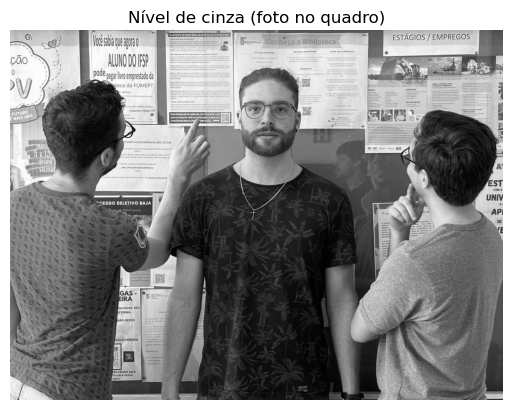

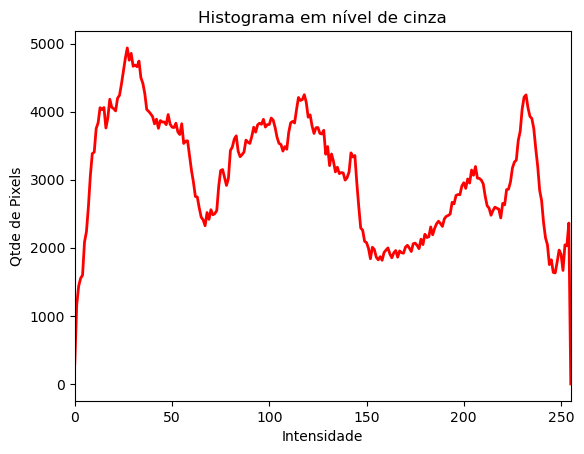

In [8]:
histograma(listaImagens[4])

# Segmentação

# Binarização

In [9]:
def thresholdAutomatico(imagem):
    # lê uma imagem
    img = cv2.imread(imagem+'.jpeg')

    # converte em nível de cinza
    cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ret é o valor limiar (threshold) que neste caso será 127
    # threshold binário
    ret1, thresh1 = cv2.threshold (cinza, 127,255, cv2.THRESH_BINARY)

    # otsu threshold
    ret2, thresh2 = cv2.threshold (cinza, 0,255, cv2.THRESH_BINARY +
                                   cv2.THRESH_OTSU)

    # triangle threshold
    ret3, thresh3 = cv2.threshold (cinza, 0,255, cv2.THRESH_BINARY +
                                   cv2.THRESH_TRIANGLE)


    # mostra as imagens geradas

    plt.figure('Binarização Automática')
    plt.figure(figsize=(20, 8))


    # img em nível de cinza
    plt.subplot (2,2, 1)
    plt.title ('Original')
    plt.imshow (cinza, 'gray' , vmin = 0, vmax = 255)
    plt.xticks ([])
    plt.yticks ([])

    # threshold binário
    plt.subplot (2,2, 2)
    plt.title ('Binary - 127')
    plt.imshow (thresh1, 'gray' , vmin = 0, vmax = 255)
    plt.xticks ([])
    plt.yticks ([])

    # Otsu threshold 
    plt.subplot (2,2, 3)
    plt.title ('Threshold Otsu')
    plt.imshow (thresh2, 'gray' , vmin = 0, vmax = 255)
    plt.xticks ([])
    plt.yticks ([])

    # triangle threshold 
    plt.subplot (2,2, 4)
    plt.title ('Threshold Triangle')
    plt.imshow (thresh3, 'gray' , vmin = 0, vmax = 255)
    plt.xticks ([])
    plt.yticks ([])

    plt.show ()

    print('limiar binario: ', ret1, 'limiar Otsu: ',ret2, 'limiar triângulo: ',ret3)

In [10]:
def thresholdAdaptativo(imagem):
    # lê uma imagem
    img = cv2.imread(imagem+'.jpeg')


    # converte em nível de cinza
    cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ret é o valor limiar (threshold) que neste caso será 127
    # threshold binário
    ret, thresh1 = cv2.threshold (cinza, 127,255, cv2.THRESH_BINARY)

    # adaptative threshold - Média
    thresh2 = cv2.adaptiveThreshold (cinza, 255,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 25,15)

    # adaptative threshold - Gaussiana
    thresh3 = cv2.adaptiveThreshold (cinza, 255,
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 25,15)

    # mostra as imagens geradas

    plt.figure('Binarização Adaptativa')
    plt.figure(figsize=(20, 8))

    # adaptative threshold média
    plt.subplot (2,2, 3)
    plt.title ('Adaptativa - Média')
    plt.imshow (thresh2, 'gray' , vmin = 0, vmax = 255)
    plt.xticks ([])
    plt.yticks ([])

    # adaptative threshold gaussiana
    plt.subplot (2,2, 4)
    plt.title ('Adaptativa - Gaussiana')
    plt.imshow (thresh3, 'gray' , vmin = 0, vmax = 255)
    plt.xticks ([])
    plt.yticks ([])


    plt.show ()


<Figure size 640x480 with 0 Axes>

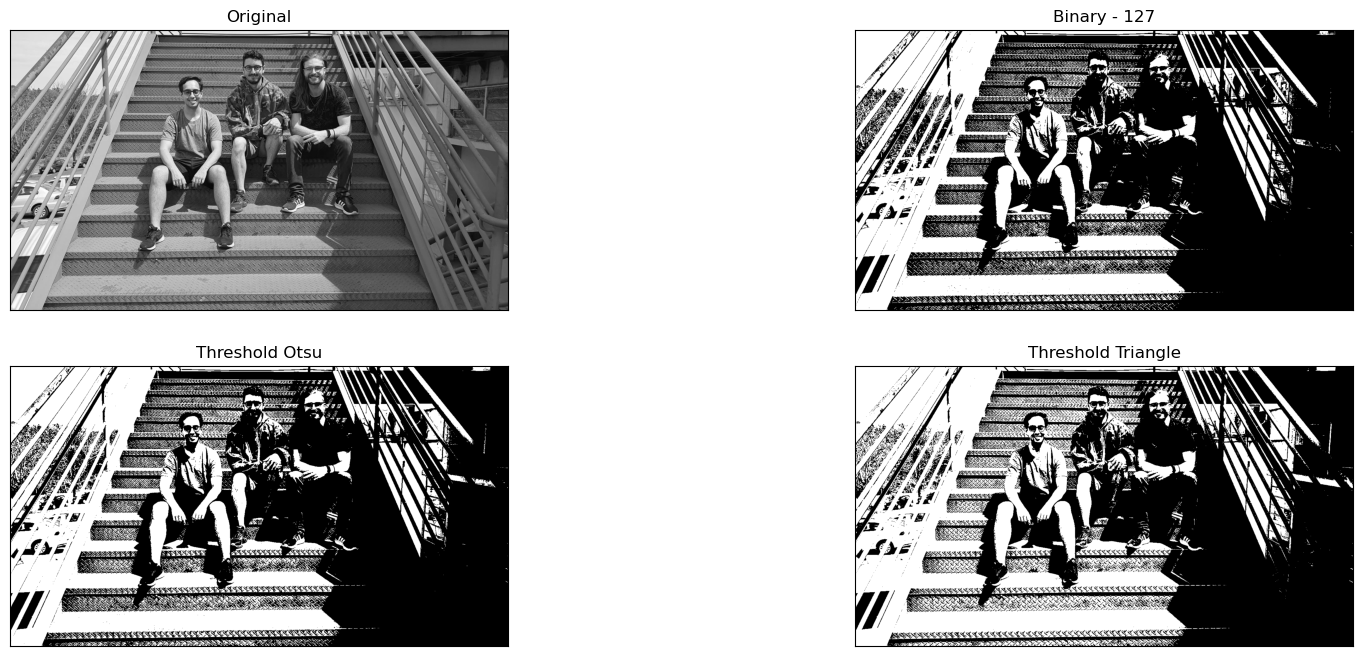

limiar binario:  127.0 limiar Otsu:  122.0 limiar triângulo:  113.0


<Figure size 640x480 with 0 Axes>

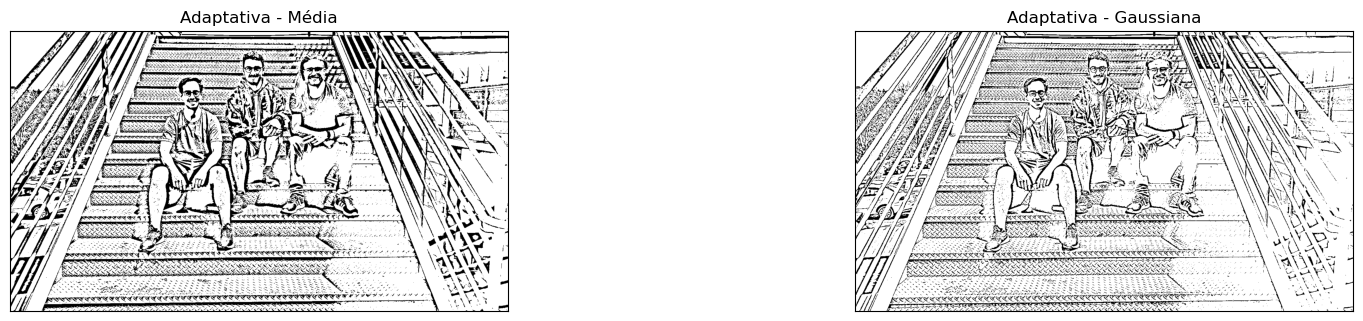

In [11]:
thresholdAutomatico(listaImagens[0])
thresholdAdaptativo(listaImagens[0])

<Figure size 640x480 with 0 Axes>

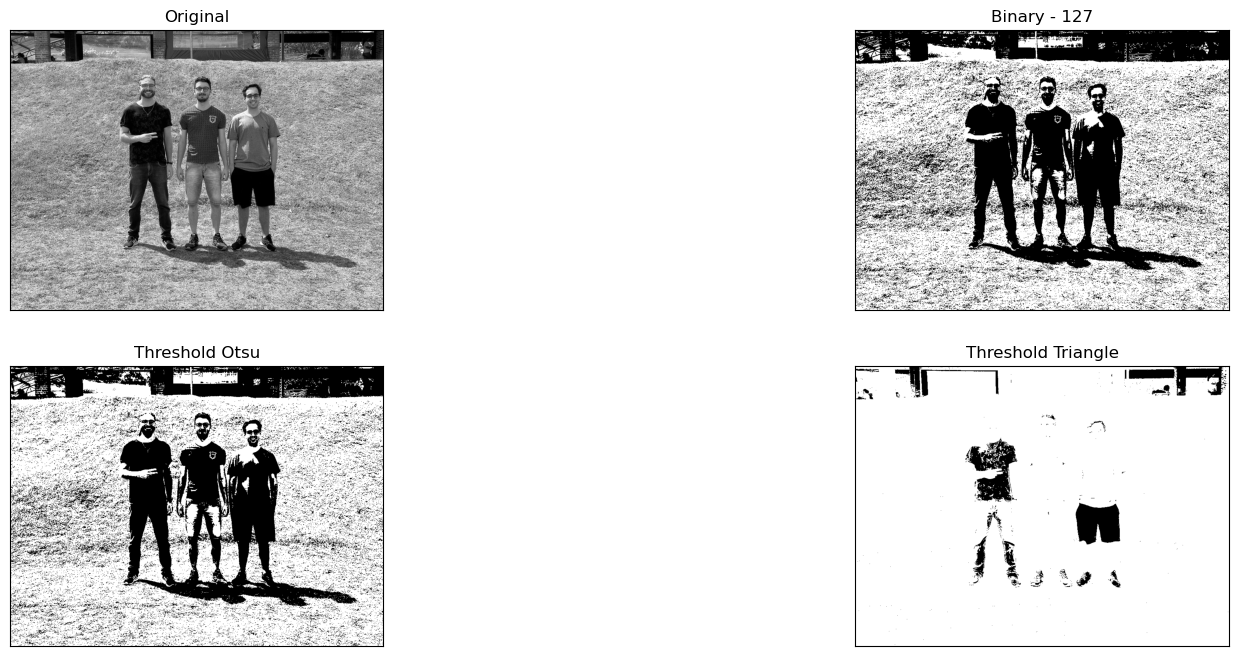

limiar binario:  127.0 limiar Otsu:  118.0 limiar triângulo:  16.0


<Figure size 640x480 with 0 Axes>

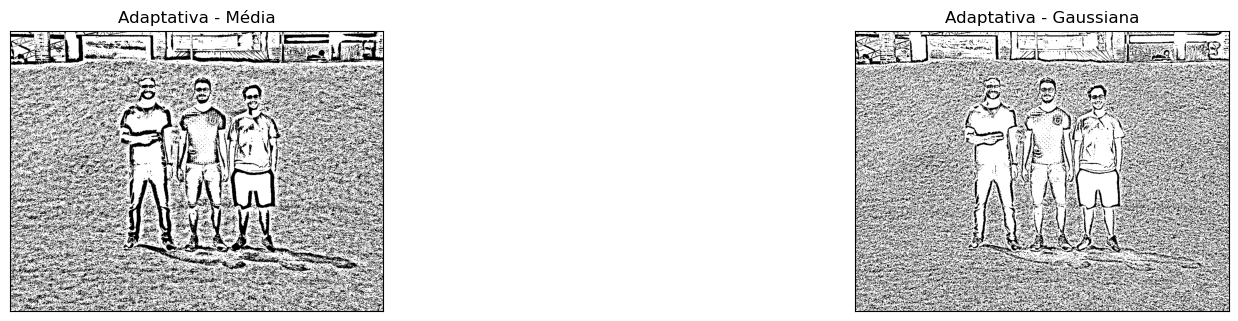

In [12]:
thresholdAutomatico(listaImagens[1])
thresholdAdaptativo(listaImagens[1])

In [ ]:
thresholdAutomatico(listaImagens[2])
thresholdAdaptativo(listaImagens[2])

In [ ]:
thresholdAutomatico(listaImagens[3])
thresholdAdaptativo(listaImagens[3])

In [ ]:
thresholdAutomatico(listaImagens[4])
thresholdAdaptativo(listaImagens[4])

# Suavização 

## Suavização pela média, gaussiana e mediana - Ruido

In [ ]:
def suavizacaoPelaMediaGaussianaMedianaRuido(imagem):
    # leitura da imagem original
    img = cv2.imread(imagem+'.jpeg')

    # calcula a suavização pela média
    media = cv2.blur(img, (5, 5))

    # calcula a suavização pela gaussiana
    gaus = cv2.GaussianBlur(img, (5, 5), 0)

    # calcula a suavização pela mediana
    mediana = cv2.medianBlur(img, 5)

    # Converte de BGR para RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    media_rgb = cv2.cvtColor(media, cv2.COLOR_BGR2RGB)
    gaus_rgb = cv2.cvtColor(gaus, cv2.COLOR_BGR2RGB)
    mediana_rgb = cv2.cvtColor(mediana, cv2.COLOR_BGR2RGB)

    # mostra as imagens geradas

    plt.figure('Borramento')
    plt.figure(figsize=(20, 8))
    # img original
    plt.subplot(2, 2, 1)
    plt.title('Original')
    plt.imshow(img_rgb)
    plt.xticks([])
    plt.yticks([])

    # tipo de suavização pela média
    plt.subplot(2, 2, 2)
    plt.title('Média 5x5')
    plt.imshow(media_rgb)
    plt.xticks([])
    plt.yticks([])

    # tipo de suavização pela gaussiana
    plt.subplot(2, 2, 3)
    plt.title('Gaussiana 5x5')
    plt.imshow(gaus_rgb)
    plt.xticks([])
    plt.yticks([])

    # tipo de suavização pela mediana
    plt.subplot(2, 2, 4)
    plt.title('Mediana 5x5')
    plt.imshow(mediana_rgb)
    plt.xticks([])
    plt.yticks([])

    # mostra a janela criada
    plt.show()


In [ ]:
suavizacaoPelaMediaGaussianaMedianaRuido(listaImagens[0])

In [ ]:
suavizacaoPelaMediaGaussianaMedianaRuido(listaImagens[1])

In [ ]:
suavizacaoPelaMediaGaussianaMedianaRuido(listaImagens[2])

In [ ]:
suavizacaoPelaMediaGaussianaMedianaRuido(listaImagens[3])

In [ ]:
suavizacaoPelaMediaGaussianaMedianaRuido(listaImagens[4])

In [ ]:
def segmentacao(imagem):
    # lê uma imagem
    img = cv2.imread(imagem+'.jpeg')

    # define uma matriz de cor zero (preto) de mesmo tamanho da imagem original
    mascara = np.zeros(img.shape[:2], dtype = "uint8")
    diferenca = np.zeros(img.shape[:2], dtype = "uint8")
    complemento = np.zeros(img.shape[:2], dtype = "uint8")

    # converte em nível de cinza
    cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # converto em cada canal
    b = img[:,:,0]
    g = img[:,:,1]
    r = img[:,:,2]

    diferenca = b - r

    v = []
    for i in range(25,80,1):
        v.append(i)


    for x in range(1, diferenca.shape[0]-1,1):
        for y in range(1,diferenca.shape[1]-1,1):
            if (diferenca[x,y] in v):
                if ((diferenca[x-1,y-1] in v) or
                    (diferenca[x-1,y] in v) or
                    (diferenca[x-1,y+1] in v) or
                    (diferenca[x,y-1] in v) or
                    (diferenca[x,y+1] in v) or
                    (diferenca[x+1,y-1] in v) or
                    (diferenca[x+1,y] in v)or
                    (diferenca[x+1,y+1] in v)):
                    mascara[x,y] = 255

    complemento = 255 - (g + 110)

    v = []
    for i in range(20,115,1):
        v.append(i)


    for x in range(1, complemento.shape[0]-1,1):
        for y in range(1,complemento.shape[1]-1,1):
            if (complemento[x,y] in v):
                if ((complemento[x-1,y-1] in v) or
                    (complemento[x-1,y] in v) or
                    (complemento[x-1,y+1] in v) or
                    (complemento[x,y-1] in v) or
                    (complemento[x,y+1] in v) or
                    (complemento[x+1,y-1] in v) or
                    (complemento[x+1,y] in v)or
                    (complemento[x+1,y+1] in v)):
                    mascara[x,y] = 255

    # mostra a máscara
    #cv2.imshow("Máscara definida",mascara)
    
    # Use o matplotlib para exibir a imagem
    plt.imshow(mascara)
    plt.title("Máscara aplicada à imagem (" + imagem + ")")
    plt.axis('off')  # Remova os eixos
    plt.show()

    # aplica a máscara a imagem
    # faz uma operação and da imagem com a imagem de acordo a máscara
    img_com_mascara = cv2.bitwise_and(img, img, mask = mascara)

    # mostra a imagem após aplicar a máscar
    #cv2.imshow("Máscara aplicada à imagem", img_com_mascara)
    
    # Use o matplotlib para exibir a imagem
    plt.imshow(img_com_mascara)
    plt.title("Máscara aplicada à imagem (" + imagem + ")")
    plt.axis('off')  # Remova os eixos
    plt.show()